In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from utils import load_data
from constants import *
from calculate_polarization import get_user_token_counts

In [16]:
reddit_2014 = load_data(DATA_PATH, year=2014, tokenize=True, frac=0.001)

Loading data...
data/politics_2014-03.bz2
data/politics_2014-02.bz2
data/politics_2014-01.bz2
Tokenizing body... (nr_rows = 1354)
	Tokenized dataframe in 1.8859 seconds


In [17]:
cols_to_disp = ["author", "body", "subreddit", "created_utc", "tokens"]

df = reddit_2014[cols_to_disp]

display(df)

,author,body,subreddit,created_utc,tokens
subreddit_id,,,,,
t5_2cneq,ModernDemagogue,open session isnt lawful demand . closed sessi...,politics,2014-01-27 18:02:55,"[open, session, isnt, law, demand, close, sess..."
t5_2cneq,LegesAequitas,absolutely . i see a lot of young people espec...,politics,2014-03-11 14:06:40,"[absolut, lot, young, peopl, oppos, polit, cor..."
t5_2cneq,supercool5000,yes . you asked for an example and i gave it t...,politics,2014-01-11 16:38:30,"[ask, gave, appar, answer, question, satisfi, ..."
t5_2cneq,Ninjabackwards,i cant really take her seriously when everythi...,politics,2014-03-31 19:32:48,[oppos]
t5_2s4gt,amish4play,the eu also sends money from have countries to...,CanadaPolitics,2014-01-02 05:31:15,"[eu, send, money, countri, countri, norway, pa..."
...,...,...,...,...,...
t5_2qh63,PabstyLoudmouth,the word anarchy comes from the ancient greek ...,Libertarian,2014-03-26 01:15:03,"[word, anarchi, ancient, greek, ἀναρχία, anarc..."
t5_2sml9,tragicjones,"thanks for the link , im glad someone thought ...",AskSocialScience,2014-01-15 21:16:11,"[link, glad, thought, track, appear, credibl, ..."
t5_2vkaw,RPrevolution,there are certain humans who lack empathy and ...,DebateAnarchism,2014-02-19 18:15:45,"[human, lack, empathi, enjoy, harm, call, psyc..."


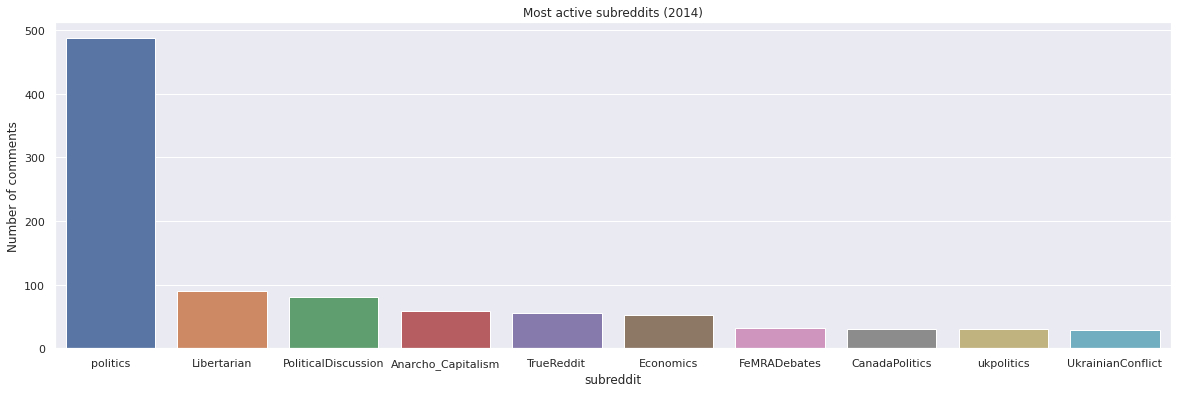

In [18]:
sub_counts_2014 = df.groupby(by=["subreddit"]).agg(count_col=pd.NamedAgg(column="created_utc", aggfunc="count"))
top_reddits = sub_counts_2014.nlargest(n=10, columns="count_col")

sns.set(font_scale=2)
sns.set(rc={'figure.figsize': (20, 6)})

ax = sns.barplot(x=top_reddits.index, y="count_col", data=top_reddits)
ax.set_title("Most active subreddits (2014)")
ax.set_ylabel("Number of comments")
plt.show()